In this competition, you will be predicting the probability [0, 1] of a binary target column.

The data contains binary features (bin_), nominal features (nom_), ordinal features (ord_*) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

Since the purpose of this competition is to explore various encoding strategies. Unlike the first Categorical Feature Encoding Challenge, the data for this challenge has missing values and feature interactions.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

we see only a subset of all the variables that are present and the target
variable

In [23]:
df_tr = pd.read_csv(r"cat_in_the_dat\input\train.csv")
print(df_tr.shape)
df_tr.head(10)

(600000, 25)


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


It is a binary classification problem.

We see that the target is skewed and thus the best metric for this binary
classification problem would be Area Under the ROC Curve (AUC). We can use
precision and recall too, but AUC combines these two metrics. Thus, we will be
using AUC to evaluate the model that we build on this dataset.

In [14]:
df_tr['target'].value_counts()

target
0    487677
1    112323
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

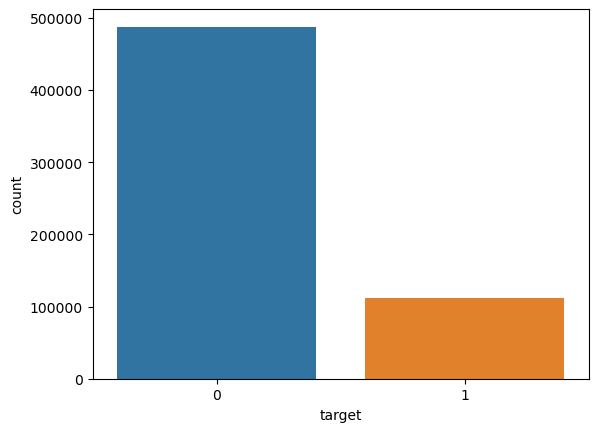

In [16]:
sns.countplot(df_tr, x='target')

Overall, there are:

• Five binary variables

• Ten nominal variables

• Six ordinal variables

• Two cyclic variables

• And a target variable

Let’s look at ord_2 feature in the dataset. It consists of six different categories:

• Freezing
• Warm
• Cold
• Boiling Hot
• Hot
• Lava Hot

In [24]:
#Label encoding
# fill NaN values in ord_2 column
df_tr.loc[:, "ord_2"] = df_tr.ord_2.fillna("NONE")
# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
# fit label encoder and transform values on ord_2 column
df_tr.loc[:, "ord_2"] = lbl_enc.fit_transform(df_tr.ord_2.values)

In [25]:
df_tr.ord_2.value_counts()

ord_2
2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: count, dtype: int64

We can use this directly in many tree-based models:

• Decision trees
• Random forest
• Extra Trees
• Or any kind of boosted trees model
o XGBoost
o GBM
o LightGBM

This type of encoding cannot be used in linear models, support vector machines or
neural networks as they expect data to be normalized (or standardized).
For these types of models, we can binarize the data.

In [26]:
df_tr.ord_4 = df_tr.ord_4.fillna("NONE")

In [32]:
df_tr.ord_4.value_counts()

ord_4
N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: count, dtype: int64

We can now define our criteria for calling a value “rare”. Let’s say the requirement
for a value being rare in this column is a count of less than 2000. So, it seems, J and
L can be marked as rare values. With pandas, it is quite easy to replace categories
based on count threshold. Let’s take a look at how it’s done.

In [38]:
df_tr.loc[df_tr["ord_4"].value_counts()[df_tr["ord_4"]].values < 2000, "ord_4"] = 'RARE'

In [39]:
df_tr.ord_4.value_counts()

ord_4
N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: count, dtype: int64

We say that wherever the value count for a certain category is less than 2000,
replace it with rare. So, now, when it comes to test data, all the new, unseen
categories will be mapped to “RARE”, and all missing values will be mapped to
“NONE”.

We have already seen the label/target distribution, and we know that it
is a binary classification problem with skewed targets. Thus, we will be using
StratifiedKFold to split the data here.

In [5]:
import pandas as pd
df_cv = pd.read_csv(r"C:\Users\raosw\projects\mlpython\cat_in_the_dat\input\cat_train_folds.csv")
df_cv


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target,kfold
0,594379,0.0,1.0,0.0,F,N,Red,Triangle,Hamster,Russia,...,1.0,Novice,Cold,k,S,fO,3.0,8.0,0,0.0
1,28928,1.0,0.0,1.0,F,N,Red,Polygon,Hamster,Russia,...,1.0,Expert,Warm,n,E,zf,6.0,5.0,0,0.0
2,5661,0.0,0.0,NaN,T,Y,Green,Circle,Dog,Russia,...,2.0,Expert,Freezing,f,A,Sz,2.0,1.0,0,0.0
3,205989,0.0,0.0,1.0,F,Y,Red,Circle,Lion,Finland,...,3.0,Novice,NaN,c,Y,gt,3.0,12.0,0,0.0
4,214034,1.0,0.0,0.0,T,N,Blue,Triangle,Hamster,India,...,2.0,Master,Warm,f,H,nn,1.0,5.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,463729,0.0,0.0,0.0,F,Y,Red,Triangle,Axolotl,Russia,...,1.0,Grandmaster,Freezing,k,X,DI,4.0,1.0,0,4.0
599996,143343,0.0,0.0,0.0,F,Y,Red,Trapezoid,Dog,Russia,...,2.0,Expert,Lava Hot,k,T,ly,7.0,1.0,0,4.0
599997,18676,0.0,0.0,0.0,F,N,Red,Polygon,Axolotl,Russia,...,1.0,Novice,Warm,a,B,Yi,1.0,11.0,0,4.0
599998,507758,0.0,0.0,1.0,T,N,Red,Triangle,Dog,Finland,...,3.0,Expert,Hot,c,P,Dj,1.0,7.0,0,4.0


In [9]:
df_cv['kfold'].value_counts()

kfold
0.0    120000
1.0    120000
2.0    120000
3.0    120000
4.0    120000
Name: count, dtype: int64